In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [2]:
pd.set_option('display.max_columns', 50)

In [5]:
df_2017 = pd.read_csv('/Users/arjunreddypulugu/Downloads/property-assessment-fy2017.csv')
df_2015 = pd.read_csv('/Users/arjunreddypulugu/Downloads/property-assessment-fy2015.csv')
df_2016 = pd.read_csv('/Users/arjunreddypulugu/Downloads/property-assessment-fy2016.csv')
df_2014 = pd.read_csv('/Users/arjunreddypulugu/Downloads/property-assessment-fy2014.csv')
df_2013 = pd.read_csv('/Users/arjunreddypulugu/Downloads/property-assessment-fy13.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_2013.shape, df_2014.shape, df_2015.shape, df_2016.shape, df_2017.shape

((165608, 54), (164091, 56), (168115, 56), (169199, 77), (170910, 75))

In [7]:
chosen_cols = ['ZIPCODE','LU','OWN_OCC','AV_TOTAL','GROSS_TAX','LAND_SF','YR_BUILT','YR_REMOD','GROSS_AREA',
              'LIVING_AREA','NUM_FLOORS','STRUCTURE_CLASS','R_BLDG_STYL','R_TOTAL_RMS','R_BDRMS','R_HEAT_TYP',
              'R_AC','R_FPLACE']

In [8]:
len(chosen_cols)

18

In [9]:
df_2013_sparse = df_2013[chosen_cols]
df_2014_sparse = df_2014[chosen_cols]
df_2015_sparse = df_2015[chosen_cols]
df_2016_sparse = df_2016[chosen_cols]
df_2017_sparse = df_2017[chosen_cols]

In [10]:
df = pd.concat([df_2013_sparse,df_2014_sparse,df_2015_sparse,df_2016_sparse,df_2017_sparse], axis=0)

In [15]:
df.shape

(302101, 18)

In [14]:
df.isna().sum()

ZIPCODE            0
LU                 0
OWN_OCC            0
AV_TOTAL           0
GROSS_TAX          0
LAND_SF            0
YR_BUILT           0
YR_REMOD           0
GROSS_AREA         0
LIVING_AREA        0
NUM_FLOORS         0
STRUCTURE_CLASS    0
R_BLDG_STYL        0
R_TOTAL_RMS        0
R_BDRMS            0
R_HEAT_TYP         0
R_AC               0
R_FPLACE           0
dtype: int64

In [13]:
df.dropna(subset = ['YR_BUILT','ZIPCODE','LU','YR_REMOD','LAND_SF', 'GROSS_AREA', 'LIVING_AREA','NUM_FLOORS','R_BDRMS','R_TOTAL_RMS','R_AC', 'STRUCTURE_CLASS' ], inplace = True)

In [16]:
df.head()

,ZIPCODE,LU,OWN_OCC,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_TOTAL_RMS,R_BDRMS,R_HEAT_TYP,R_AC,R_FPLACE
1,2128.0,R3,N,244000,320616,1150.0,1920.0,2000.0,3299.0,2307.0,3.0,R,RM,9.0,3.0,F,Y,0.0
2,2128.0,R3,N,221000,290394,1150.0,1905.0,1985.0,3392.0,2268.0,3.0,R,RM,13.0,5.0,S,N,0.0
3,2128.0,R3,N,218400,286978,1150.0,1900.0,1991.0,3108.0,2028.0,3.0,R,RM,11.0,5.0,W,N,0.0
4,2128.0,R2,Y,233500,306819,2010.0,1900.0,1978.0,3700.0,2546.0,3.0,R,RE,13.0,6.0,W,N,0.0
5,2128.0,R3,Y,291200,382637,2500.0,1900.0,0.0,6278.0,4362.0,3.0,R,DK,18.0,12.0,E,N,0.0


In [17]:
df.describe()

,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,R_FPLACE
count,3.021010e+05,3.021010e+05,302101.000000,302101.000000,302101.000000,302101.000000,302101.000000,302101.000000,302101.000000,302101.000000,302101.000000
mean,4.715838e+05,3.386356e+05,4764.818349,1916.477592,675.860202,3812.585092,2391.011784,2.176616,10.088619,4.626843,0.367139
std,4.480947e+05,4.895681e+05,3624.902341,28.965299,945.254211,1477.885307,1037.568565,0.621221,3.759033,1.946712,0.758115
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.010000e+05,4.800000e+03,3026.000000,1900.000000,0.000000,2608.000000,1562.000000,2.000000,7.000000,3.000000,0.000000
50%,3.841000e+05,3.339020e+05,4414.000000,1910.000000,0.000000,3579.000000,2232.000000,2.000000,10.000000,4.000000,0.000000
75%,5.079000e+05,4.983650e+05,5840.000000,1930.000000,1991.000000,4879.000000,3099.000000,2.500000,13.000000,6.000000,1.000000
max,2.309570e+07,2.445835e+07,297883.000000,2015.000000,2016.000000,23335.000000,22159.000000,6.000000,28.000000,18.000000,17.000000


In [21]:
df_copy = df.copy()

for column in ['AV_TOTAL','GROSS_TAX','LAND_SF','GROSS_AREA','LIVING_AREA']:
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df_copy = df_copy[(df_copy[column]>lower) & (df_copy[column]<upper)]
    

In [22]:
df_copy.shape

(269047, 18)

In [23]:
df_copy['Age'] = pd.Timestamp.now().year - df_copy['YR_BUILT']
df_copy['Age_R'] = pd.Timestamp.now().year - df_copy['YR_REMOD']

In [24]:
df_copy.drop(columns = ['YR_BUILT','YR_REMOD' ], axis =1, inplace =True)

In [25]:
for column in ['Age']:
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df_copy = df_copy[(df_copy[column]>lower) & (df_copy[column]<upper)]

In [26]:
df_copy.shape

(257740, 18)

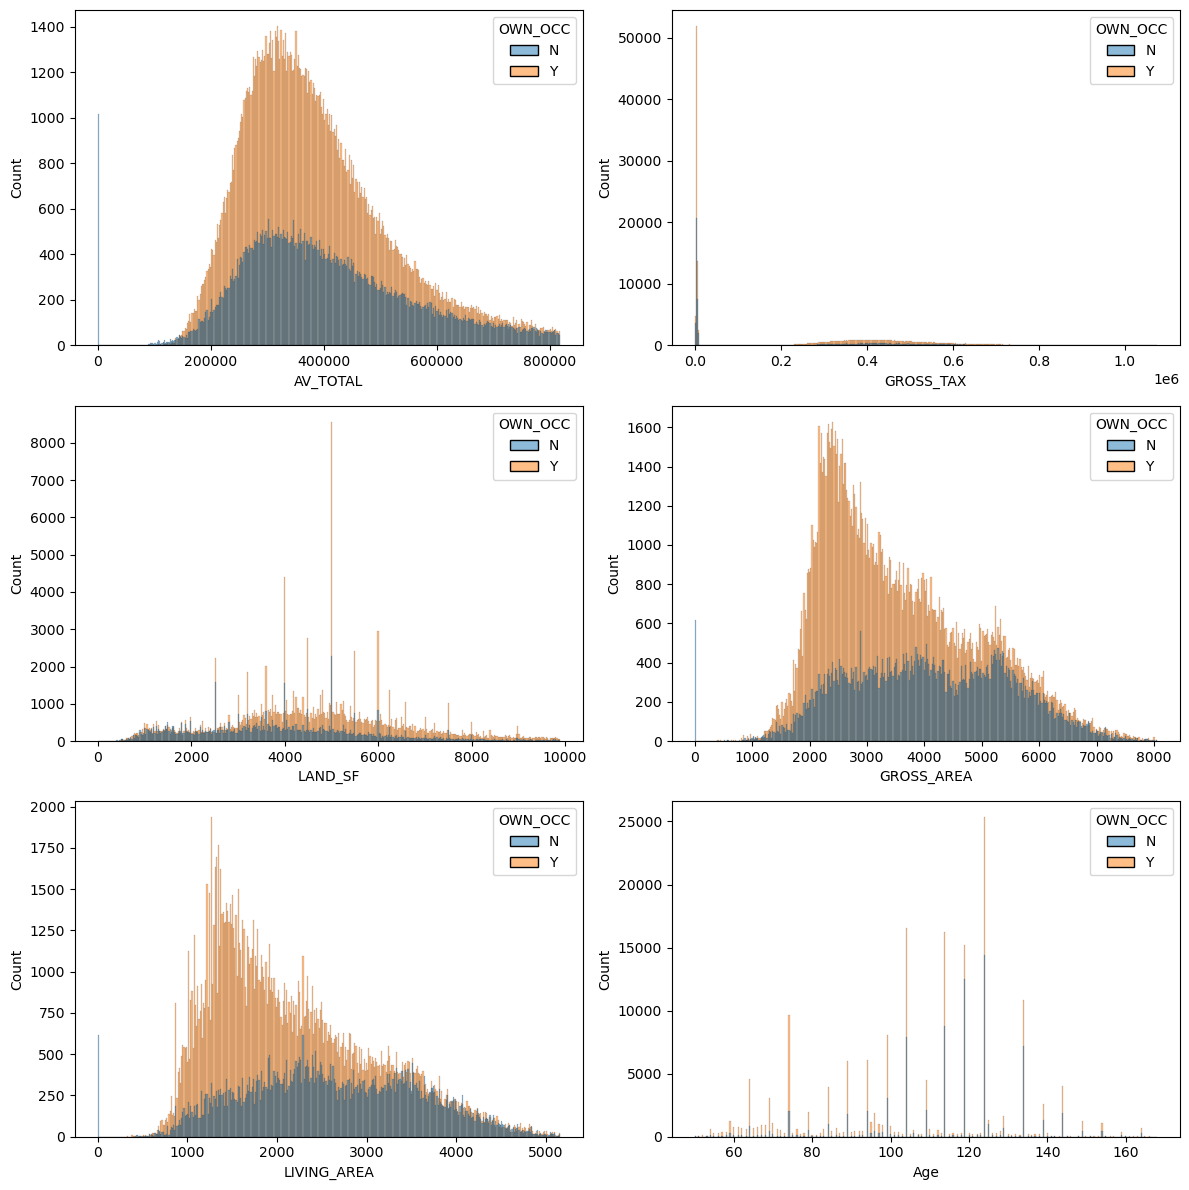

In [70]:
fig, axes = plt.subplots(nrows =3, ncols =2, figsize = (12,12))
axes =axes.flatten()

for i,col in enumerate(['AV_TOTAL','GROSS_TAX','LAND_SF','GROSS_AREA','LIVING_AREA', 'Age']):
    sns.histplot(x= df_copy[col], bins = 400, hue = df_copy['OWN_OCC'], ax= axes[i])
    axes[i].set_title('')
plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.show()

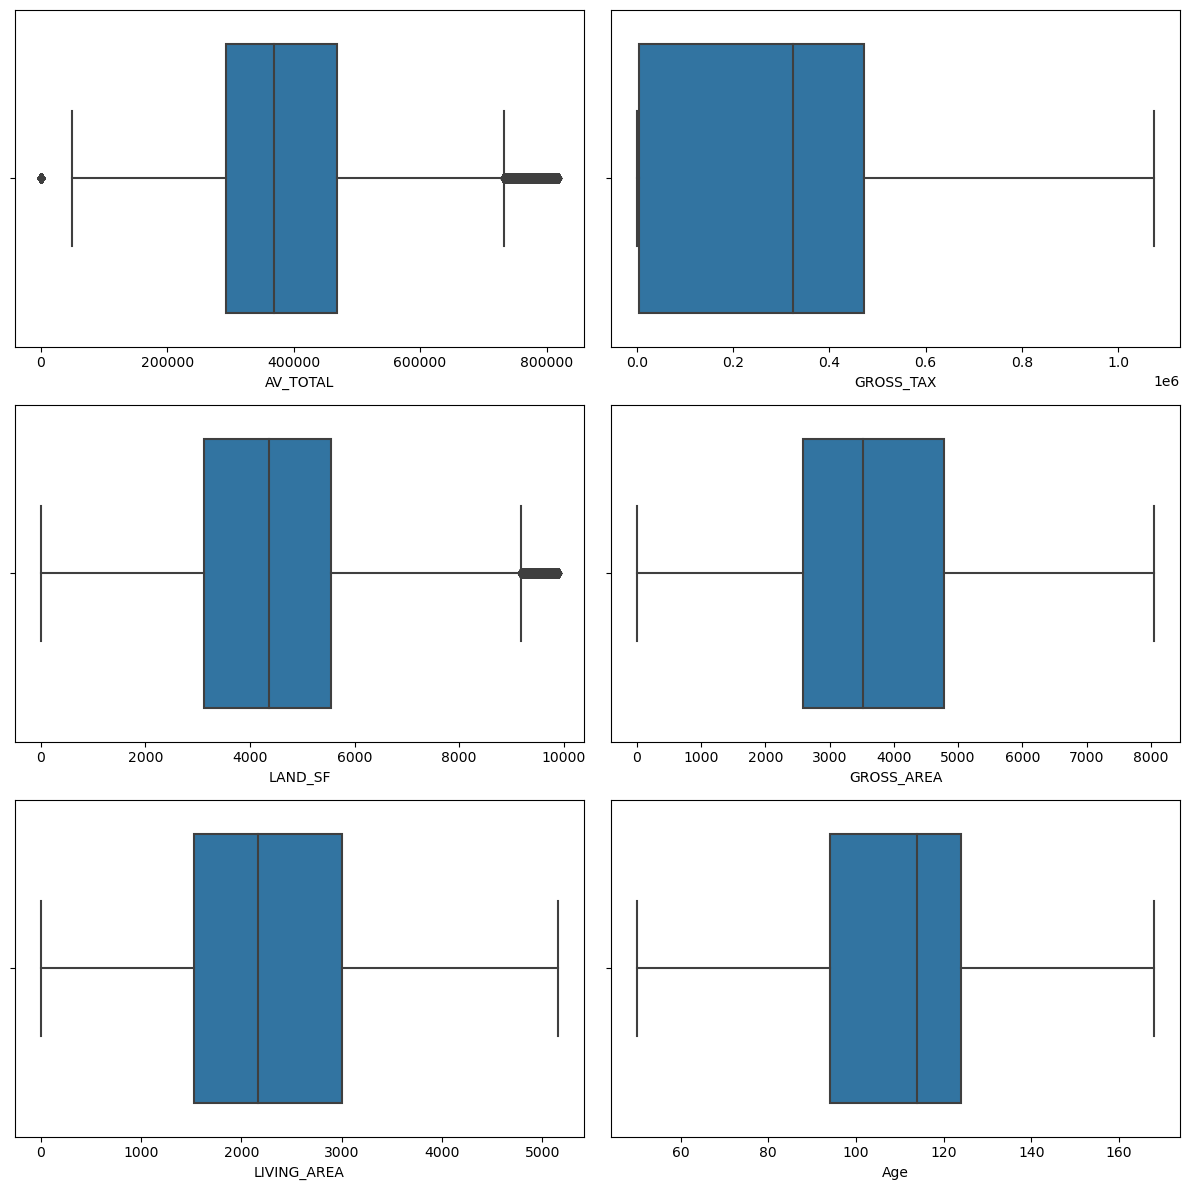

In [72]:
fig, axes = plt.subplots(nrows =3, ncols =2, figsize = (12,12))
axes =axes.flatten()

for i,col in enumerate(['AV_TOTAL','GROSS_TAX','LAND_SF','GROSS_AREA','LIVING_AREA', 'Age']):
    sns.boxplot(x= df_copy[col],hue = df_copy['OWN_OCC'], ax= axes[i])
    axes[i].set_title('')
plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.show()

In [73]:
df_copy.head()

,ZIPCODE,LU,OWN_OCC,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_TOTAL_RMS,R_BDRMS,R_HEAT_TYP,R_AC,R_FPLACE,Age,Age_R
0,2128.0,R3,N,244000,320616,1150.0,3299.0,2307.0,3.0,R,RM,9.0,3.0,F,Y,0.0,104.0,24.0
1,2128.0,R3,N,221000,290394,1150.0,3392.0,2268.0,3.0,R,RM,13.0,5.0,S,N,0.0,119.0,39.0
2,2128.0,R3,N,218400,286978,1150.0,3108.0,2028.0,3.0,R,RM,11.0,5.0,W,N,0.0,124.0,33.0
3,2128.0,R2,Y,233500,306819,2010.0,3700.0,2546.0,3.0,R,RE,13.0,6.0,W,N,0.0,124.0,46.0
4,2128.0,R3,Y,291200,382637,2500.0,6278.0,4362.0,3.0,R,DK,18.0,12.0,E,N,0.0,124.0,2024.0


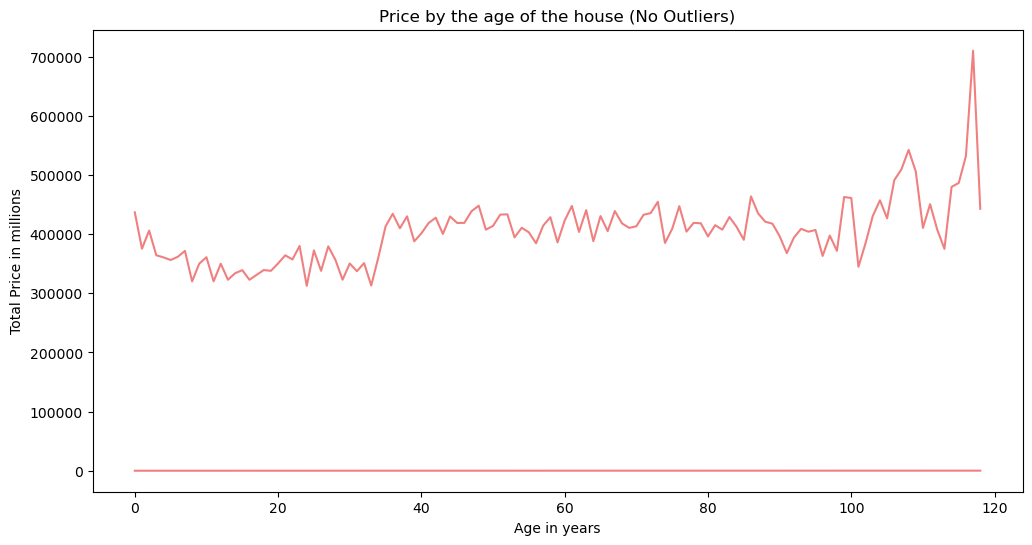

In [76]:
plt.figure(figsize = (12,6))
plt.plot(df_copy.groupby('Age')['AV_TOTAL'].mean().reset_index(), color = 'lightcoral')
plt.title('Price by the age of the house (No Outliers)')
plt.xlabel('Age in years')
plt.ylabel('Total Price in millions')
plt.show()

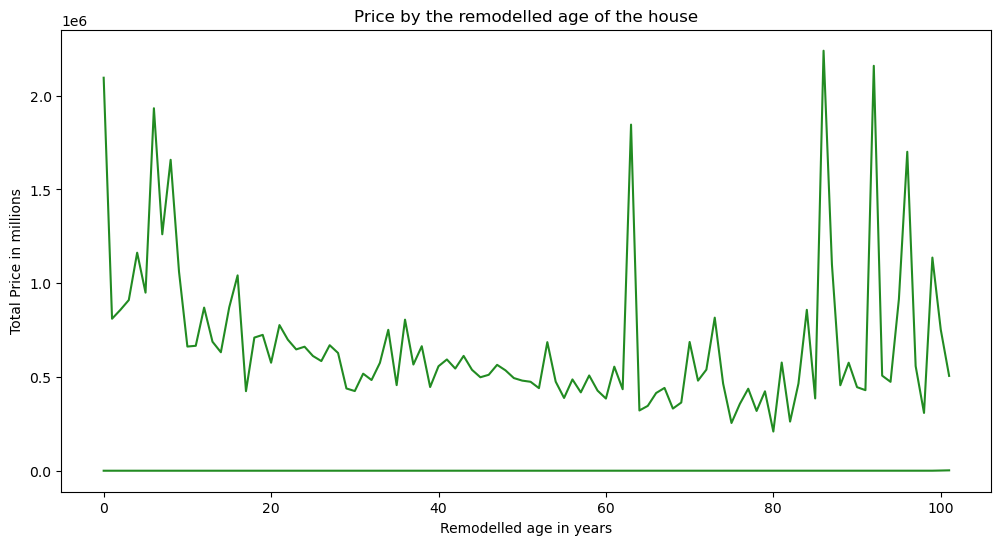

In [102]:
plt.figure(figsize = (12,6))
plt.plot(df_Age_Remod, color = 'forestgreen')
plt.title('Price by the remodelled age of the house')
plt.xlabel('Remodelled age in years')
plt.ylabel('Total Price in millions')
plt.show()

In [78]:
df_floors = df_filled.groupby('NUM_FLOORS')['AV_TOTAL'].mean().reset_index()

In [83]:
df_floors['NUM_FLOORS'] = df_floors['NUM_FLOORS'].round()

In [86]:
df_floors = df_floors[df_floors['NUM_FLOORS'] !=0]

In [94]:
df_floors = df_floors[df_floors['NUM_FLOORS'] != 36]

In [90]:
df_floors['NUM_FLOORS'] = df_floors['NUM_FLOORS'].astype(int)

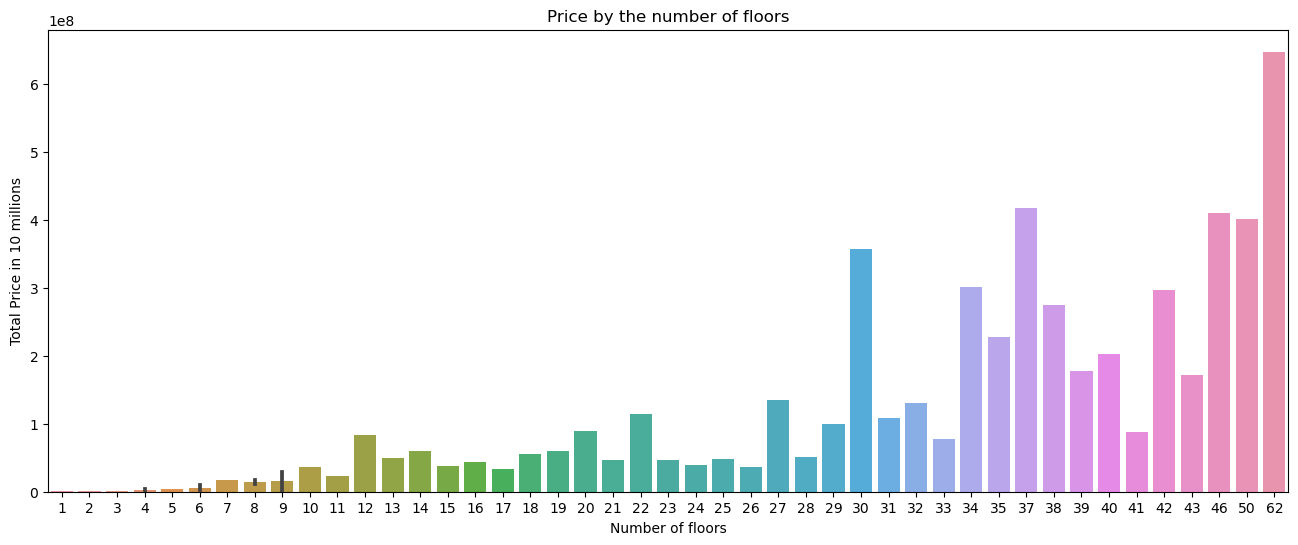

In [95]:
plt.figure(figsize = (16,6))
sns.barplot(x=df_floors['NUM_FLOORS'], y=df_floors['AV_TOTAL'])
plt.title('Price by the number of floors')
plt.xlabel('Number of floors')
plt.ylabel('Total Price in 10 millions')
plt.show()

In [97]:
df_fp = df_filled.groupby('R_FPLACE')['AV_TOTAL'].mean().reset_index()

In [99]:
df_fp['R_FPLACE'] = df_fp['R_FPLACE'].astype(int)

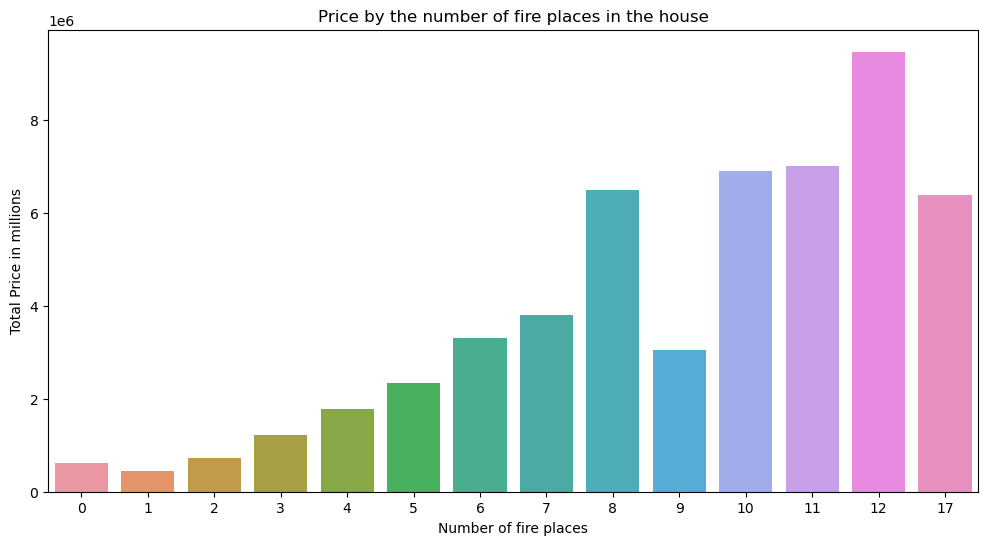

In [101]:
plt.figure(figsize = (12,6))
sns.barplot(x=df_fp['R_FPLACE'], y=df_fp['AV_TOTAL'])
plt.title('Price by the number of fire places in the house')
plt.xlabel('Number of fire places')
plt.ylabel('Total Price in millions')
plt.show()

In [104]:
df_ac = df_filled.groupby('R_AC')['AV_TOTAL'].mean().reset_index()

In [118]:
df_ac['R_AC'] =df_ac['R_AC'].replace({'C': 'Central AC', 'D': 'Ductless AC', 'N': 'No AC', 'Y': 'Just AC'})

In [121]:
df_ac = df_ac.sort_values(by = "AV_TOTAL", ascending =False)

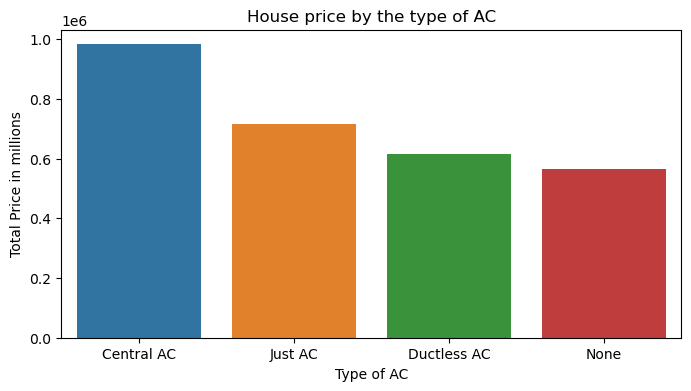

In [122]:
plt.figure(figsize = (8, 4))
sns.barplot(x= df_ac['R_AC'], y =df_ac['AV_TOTAL'])
plt.title('House price by the type of AC')
plt.xlabel('Type of AC')
plt.ylabel('Total Price in millions')
plt.show()

In [128]:
df_heat = df_filled.groupby('R_HEAT_TYP')['AV_TOTAL'].mean().reset_index()

In [130]:
df_heat = df_heat.replace({'E' : 'Electric', 'F' : 'Forced Air', 'N': 'No heating', 'O': 'Other','P': 'Heat Pump', 
                          'S': 'Space Heater','W': 'Hot Water' })

In [131]:
df_heat = df_heat.sort_values(by = 'AV_TOTAL', ascending = False)

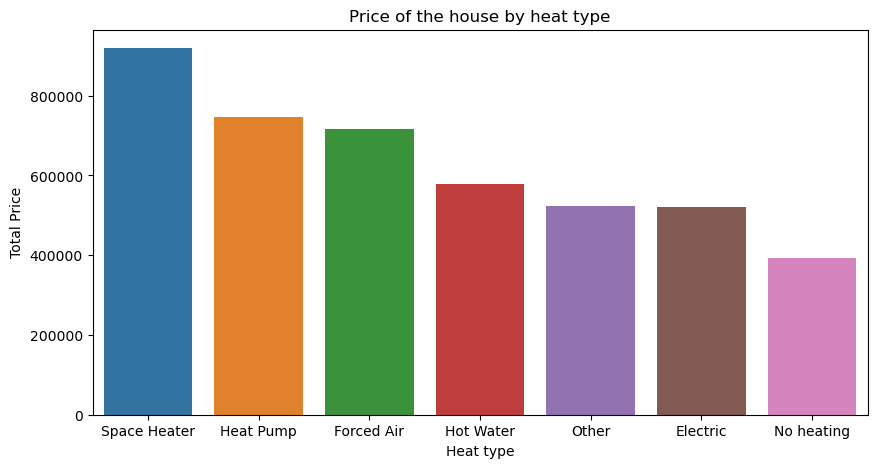

In [137]:
plt.figure(figsize = (10,5))
sns.barplot(x= df_heat['R_HEAT_TYP'], y = df_heat['AV_TOTAL'])
plt.title('Price of the house by heat type')
plt.xlabel('Heat type')
plt.ylabel('Total Price')
plt.show()

In [138]:
df_class = df_filled.groupby('STRUCTURE_CLASS')['AV_TOTAL'].mean().reset_index()

In [149]:
df_class = df_class.replace({'A': 'Struct Steel', 'B' : 'Reinforced Concrete', 
                             'C' : 'Brick/Concrete' , 'D' : 'Wood/Frame' ,
                             'E' : 'Metal' , 'R' : 'Residential'})

In [151]:
df_class = df_class.sort_values(by = 'AV_TOTAL', ascending = False)

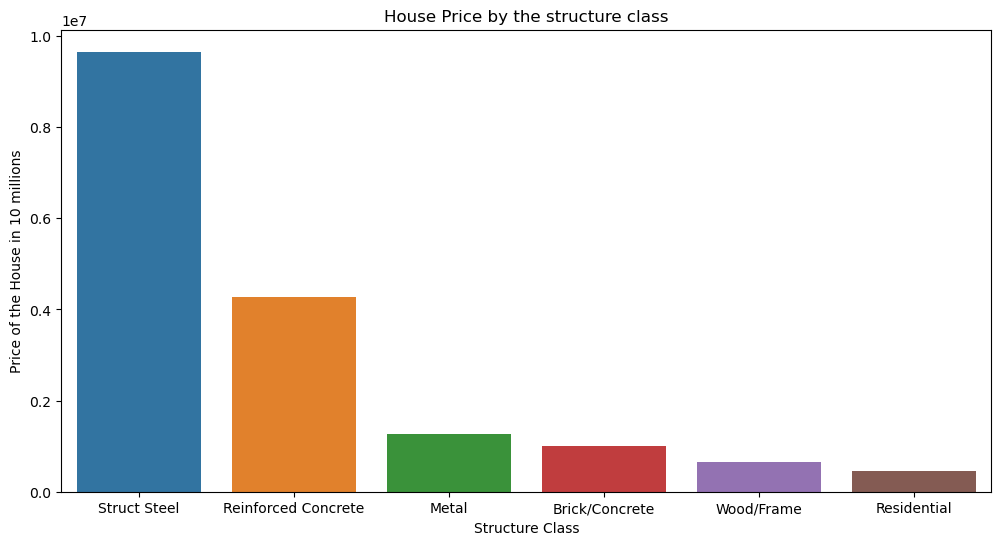

In [153]:
plt.figure(figsize = (12,6))
sns.barplot(x = df_class['STRUCTURE_CLASS'], y= df_class['AV_TOTAL'])
plt.title('House Price by the structure class')
plt.xlabel("Structure Class")
plt.ylabel('Price of the House in 10 millions')
plt.show()

In [154]:
df_filled.head()

,ZIPCODE,LU,OWN_OCC,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_TOTAL_RMS,R_BDRMS,R_HEAT_TYP,R_AC,R_FPLACE,Age,Age_Remod
1,2128.0,R3,N,244000,320616,1150.0,3299.0,2307.0,3.0,R,RM,9.0,3.0,F,Y,0.0,104.0,24.0
2,2128.0,R3,N,221000,290394,1150.0,3392.0,2268.0,3.0,R,RM,13.0,5.0,S,N,0.0,119.0,39.0
3,2128.0,R3,N,218400,286978,1150.0,3108.0,2028.0,3.0,R,RM,11.0,5.0,W,N,0.0,124.0,33.0
4,2128.0,R2,Y,233500,306819,2010.0,3700.0,2546.0,3.0,R,RE,13.0,6.0,W,N,0.0,124.0,46.0
5,2128.0,R3,Y,291200,382637,2500.0,6278.0,4362.0,3.0,R,DK,18.0,12.0,E,N,0.0,124.0,2024.0


In [63]:
df_filled['Age'] = pd.Timestamp.now().year - df_filled['YR_BUILT']
df_filled['Age_Remod'] = pd.Timestamp.now().year - df_filled['YR_REMOD']

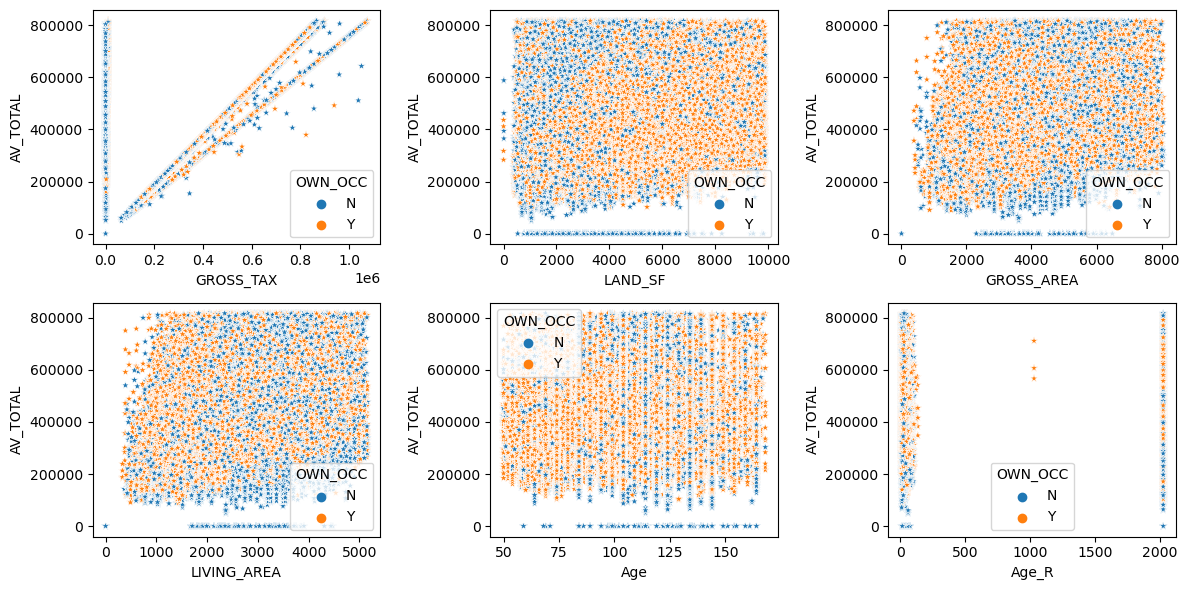

In [80]:
fig, axes = plt.subplots(nrows =2, ncols=3, figsize = (12, 6))
axes = axes.flatten()

for i, col in enumerate(['GROSS_TAX', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'Age', 'Age_R']):
    sns.scatterplot(x = df_copy[col], y = df_copy['AV_TOTAL'], hue=df_copy['OWN_OCC'], marker = "*", color = 'navy', ax= axes[i])
    axes[i].set_title('')
plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.show()

In [140]:
df_copy.shape

(257740, 18)

In [141]:
df_copy['ZIPCODE'] = df_copy['ZIPCODE'].apply(lambda x: x.rstrip('_') if isinstance(x, str) and x.endswith('_') else x)

In [146]:
for col in ['ZIPCODE','LAND_SF','GROSS_AREA','LIVING_AREA','NUM_FLOORS','R_TOTAL_RMS','R_BDRMS','R_FPLACE','Age','Age_R']:
    df_copy[col] = df_copy[col].astype(int)

In [153]:
df_copy['ZIPCODE'] = df_copy['ZIPCODE'].astype('category')

In [154]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257740 entries, 0 to 302098
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ZIPCODE          257740 non-null  category
 1   LU               257740 non-null  object  
 2   OWN_OCC          257740 non-null  object  
 3   AV_TOTAL         257740 non-null  int64   
 4   GROSS_TAX        257740 non-null  int64   
 5   LAND_SF          257740 non-null  int64   
 6   GROSS_AREA       257740 non-null  int64   
 7   LIVING_AREA      257740 non-null  int64   
 8   NUM_FLOORS       257740 non-null  int64   
 9   STRUCTURE_CLASS  257740 non-null  object  
 10  R_BLDG_STYL      257740 non-null  object  
 11  R_TOTAL_RMS      257740 non-null  int64   
 12  R_BDRMS          257740 non-null  int64   
 13  R_HEAT_TYP       257740 non-null  object  
 14  R_AC             257740 non-null  object  
 15  R_FPLACE         257740 non-null  int64   
 16  Age              257

In [155]:
df_copy.head()

,ZIPCODE,LU,OWN_OCC,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_TOTAL_RMS,R_BDRMS,R_HEAT_TYP,R_AC,R_FPLACE,Age,Age_R
0,2128,R3,N,244000,320616,1150,3299,2307,3,R,RM,9,3,F,Y,0,104,24
1,2128,R3,N,221000,290394,1150,3392,2268,3,R,RM,13,5,S,N,0,119,39
2,2128,R3,N,218400,286978,1150,3108,2028,3,R,RM,11,5,W,N,0,124,33
3,2128,R2,Y,233500,306819,2010,3700,2546,3,R,RE,13,6,W,N,0,124,46
4,2128,R3,Y,291200,382637,2500,6278,4362,3,R,DK,18,12,E,N,0,124,2024


In [189]:
df_copy.shape

(257740, 18)

In [190]:
df_num = df_copy.select_dtypes(include = np.number)
df_cat = df_copy.select_dtypes(exclude = np.number)

In [191]:
encoder = LabelEncoder()

for col in df_cat.columns:
    df_cat[col] = encoder.fit_transform(df_cat[col])
    

In [192]:
df_cat.head()

,ZIPCODE,LU,OWN_OCC,STRUCTURE_CLASS,R_BLDG_STYL,R_HEAT_TYP,R_AC
0,15,6,0,2,10,1,3
1,15,6,0,2,10,5,2
2,15,6,0,2,10,6,2
3,15,5,1,2,9,6,2
4,15,6,1,2,6,0,2


In [196]:
df_cat.shape

(257740, 7)

In [193]:
df_num.head()

,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,R_FPLACE,Age,Age_R
0,244000,320616,1150,3299,2307,3,9,3,0,104,24
1,221000,290394,1150,3392,2268,3,13,5,0,119,39
2,218400,286978,1150,3108,2028,3,11,5,0,124,33
3,233500,306819,2010,3700,2546,3,13,6,0,124,46
4,291200,382637,2500,6278,4362,3,18,12,0,124,2024


In [194]:
y = df_num['AV_TOTAL']

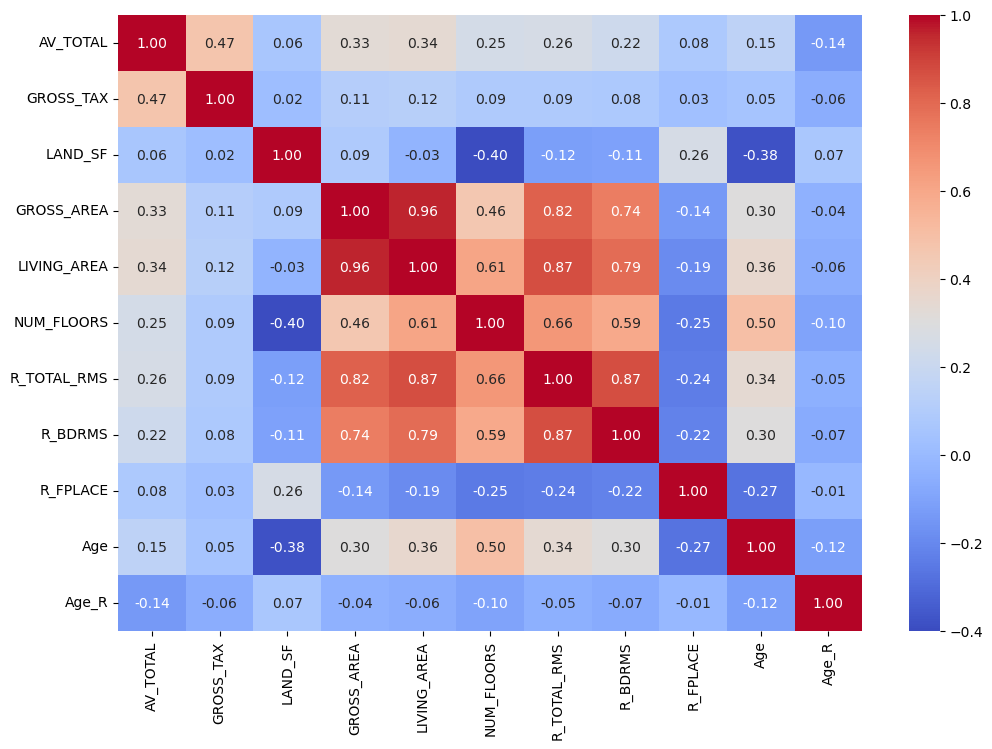

In [173]:
plt.figure(figsize = (12,8))

sns.heatmap(df_num.corr().round(2), cmap = 'coolwarm', annot =True, fmt= '.2f')
plt.show()

In [195]:
len(y)

257740

In [199]:
df_num.drop(columns = ['LIVING_AREA','R_TOTAL_RMS', 'R_BDRMS'], axis =1, inplace = True)

In [200]:
df_num.head()

,GROSS_TAX,LAND_SF,GROSS_AREA,NUM_FLOORS,R_FPLACE,Age,Age_R
0,320616,1150,3299,3,0,104,24
1,290394,1150,3392,3,0,119,39
2,286978,1150,3108,3,0,124,33
3,306819,2010,3700,3,0,124,46
4,382637,2500,6278,3,0,124,2024


In [201]:
df_num.shape

(257740, 7)

In [202]:
scaler = StandardScaler()

df_num_scaled = scaler.fit_transform(df_num)

In [203]:
df_num_scaled_frame = pd.DataFrame(df_num_scaled, columns =df_num.columns )

In [207]:
df_num_scaled_frame.shape

(257740, 7)

In [208]:
df_num_scaled_frame.shape, df_cat.shape


((257740, 7), (257740, 7))

In [209]:
df_num_scaled_frame.reset_index(drop=True, inplace = True)
df_cat.reset_index(drop =True , inplace =True)

In [210]:
df_final = pd.concat([df_num_scaled_frame,df_cat], axis =1)

In [211]:
df_final.shape

(257740, 14)

In [185]:
df_concatenated['ZIPCODE'] = encoder.fit_transform(df_concatenated['ZIPCODE'])

In [212]:
df_final.shape, len(y)

((257740, 14), 257740)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size = 0.2, random_state = 22)


In [214]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((206192, 14), (51548, 14), (206192,), (51548,))

In [215]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [218]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [227]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [235]:
rmse_train = sqrt(mean_squared_error(y_train, pred_train))
rmse_test = sqrt(mean_squared_error(y_test, pred_test))

In [236]:
rmse_train, rmse_test

(104876.16661020077, 105103.11878790606)

In [237]:
y.mean()

392865.9883758827

In [239]:
r2 = r2_score(y_test, pred_test)

In [240]:
r2

0.4201570662557761

In [241]:
model1 = Lasso()
model1.fit(X_train, y_train)

Lasso()

In [242]:
pred_train_1 = model1.predict(X_train)
pred_test_1 = model1.predict(X_test)
r2_1 = r2_score(y_test, pred_test_1)
r2_1

0.4201580122667241

In [243]:
df_final.head()

,GROSS_TAX,LAND_SF,GROSS_AREA,NUM_FLOORS,R_FPLACE,Age,Age_R,ZIPCODE,LU,OWN_OCC,STRUCTURE_CLASS,R_BLDG_STYL,R_HEAT_TYP,R_AC
0,0.166686,-1.701943,-0.313573,1.524947,-0.512486,-0.190018,-1.455554,15,6,0,2,10,1,3
1,0.049093,-1.701943,-0.245978,1.524947,-0.512486,0.479764,-1.439475,15,6,0,2,10,5,2
2,0.035802,-1.701943,-0.452398,1.524947,-0.512486,0.703025,-1.445907,15,6,0,2,10,6,2
3,0.113003,-1.253560,-0.022114,1.524947,-0.512486,0.703025,-1.431971,15,5,1,2,9,6,2
4,0.408009,-0.998086,1.851657,1.524947,-0.512486,0.703025,0.688379,15,6,1,2,6,0,2


In [245]:
poly = PolynomialFeatures(degree=2, include_bias =False)
df_final_poly = poly.fit_transform(df_final)
df_poly = pd.DataFrame(df_final_poly, columns = poly.get_feature_names_out(df_final.columns))

In [246]:
df_poly.shape

(257740, 119)

In [247]:
X_train_poly, X_test_poly, y_trian_poly, y_test_poly = train_test_split(df_poly, y, test_size = 0.2, random_state = 22)

In [248]:
X_train_poly.shape, X_test_poly.shape, y_trian_poly.shape, y_test_poly.shape

((206192, 119), (51548, 119), (206192,), (51548,))

In [250]:
model_p = LinearRegression()
model_p.fit(X_train_poly, y_trian_poly)

LinearRegression()

In [251]:
test_pred_poly = model_p.predict(X_test_poly)
train_pred_poly = model_p.predict(X_train_poly)

In [252]:
rmse_train_poly = sqrt(mean_squared_error(y_trian_poly, train_pred_poly))
rmse_test_poly = sqrt(mean_squared_error(y_test_poly, test_pred_poly))

In [253]:
rmse_train_poly, rmse_test_poly

(78206.50766254694, 77984.99140293738)

In [254]:
r2_poly = r2_score(y_test_poly, test_pred_poly)

In [255]:
r2_poly

0.6807718216690639

In [256]:
poly3 = PolynomialFeatures(degree=3, include_bias = False)
poly3_series = poly3.fit_transform(df_final)
poly3_df = pd.DataFrame(poly3_series, columns = poly3.get_feature_names_out(df_final.columns))

In [257]:
poly3_df.shape

(257740, 679)

In [258]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(poly3_df, y, test_size = 0.2, random_state = 33)


In [259]:
X_train_3.shape, X_test_3.shape, y_train_3.shape, y_test_3.shape

((206192, 679), (51548, 679), (206192,), (51548,))

In [260]:
model_p3 = LinearRegression()
model_p3.fit(X_train_3, y_train_3)

LinearRegression()

In [261]:
train_pred_3 = model_p3.predict(X_train_3)
test_pred_3 = model_p3.predict(X_test_3)
train_rmse3 = sqrt(mean_squared_error(y_train_3,train_pred_3 ))
test_rmse3 = sqrt(mean_squared_error(y_test_3, test_pred_3))

In [262]:
train_rmse3, test_rmse3

(69439.87909598839, 101742.21601226235)

In [263]:
r2_poly_3 = r2_score(y_test_3, test_pred_3)
r2_poly_3

0.45584204326042765

In [264]:
lasso =Lasso()
lasso.fit(X_train_3, y_train_3)

Lasso()

In [265]:
train_pred_3l = lasso.predict(X_train_3)
test_pred_3l = lasso.predict(X_test_3)
train_rmse3l = sqrt(mean_squared_error(y_train_3,train_pred_3l ))
test_rmse3l = sqrt(mean_squared_error(y_test_3, test_pred_3l))

In [266]:
train_rmse3l, test_rmse3l

(70047.2830373818, 70075.57992371592)

In [267]:
r2_lasso = r2_score(y_test_3, test_pred_3l)
r2_lasso

0.7418595875106658

In [274]:
results = pd.DataFrame({'Degree': ['One', 'Two', 'Three'], 'r2': [0.42, 0.68, 0.74 ]})

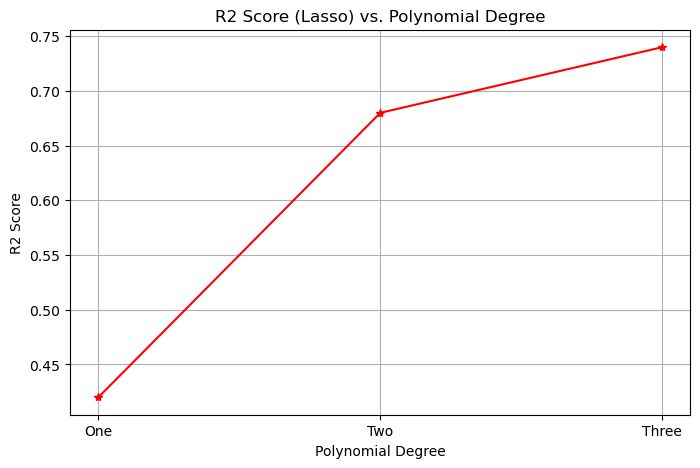

In [282]:
plt.figure(figsize=(8, 5))
plt.plot(results['Degree'], results['r2'], marker='*', color='r', linestyle='-')
plt.title('R2 Score (Lasso) vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

In [27]:
df_copy.head()

,ZIPCODE,LU,OWN_OCC,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,LIVING_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_TOTAL_RMS,R_BDRMS,R_HEAT_TYP,R_AC,R_FPLACE,Age,Age_R
0,2128.0,R3,N,244000,320616,1150.0,3299.0,2307.0,3.0,R,RM,9.0,3.0,F,Y,0.0,104.0,24.0
1,2128.0,R3,N,221000,290394,1150.0,3392.0,2268.0,3.0,R,RM,13.0,5.0,S,N,0.0,119.0,39.0
2,2128.0,R3,N,218400,286978,1150.0,3108.0,2028.0,3.0,R,RM,11.0,5.0,W,N,0.0,124.0,33.0
3,2128.0,R2,Y,233500,306819,2010.0,3700.0,2546.0,3.0,R,RE,13.0,6.0,W,N,0.0,124.0,46.0
4,2128.0,R3,Y,291200,382637,2500.0,6278.0,4362.0,3.0,R,DK,18.0,12.0,E,N,0.0,124.0,2024.0


In [29]:
df_copy.isna().sum().sum()

0

In [287]:
df_own = df_copy.groupby('OWN_OCC')['GROSS_TAX'].mean().reset_index()

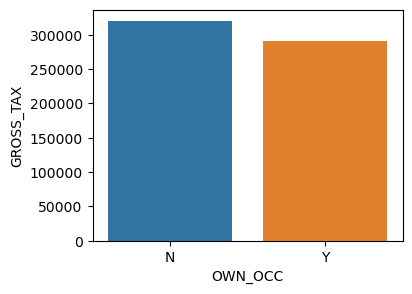

In [292]:
plt.figure(figsize = (4,3))
sns.barplot(x=df_own['OWN_OCC'], y = df_copy['GROSS_TAX'])
plt.show()

In [30]:
df_log = df_copy.drop(columns = ['LIVING_AREA','R_TOTAL_RMS', 'R_BDRMS'])

In [31]:
df_log.head()

,ZIPCODE,LU,OWN_OCC,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,NUM_FLOORS,STRUCTURE_CLASS,R_BLDG_STYL,R_HEAT_TYP,R_AC,R_FPLACE,Age,Age_R
0,2128.0,R3,N,244000,320616,1150.0,3299.0,3.0,R,RM,F,Y,0.0,104.0,24.0
1,2128.0,R3,N,221000,290394,1150.0,3392.0,3.0,R,RM,S,N,0.0,119.0,39.0
2,2128.0,R3,N,218400,286978,1150.0,3108.0,3.0,R,RM,W,N,0.0,124.0,33.0
3,2128.0,R2,Y,233500,306819,2010.0,3700.0,3.0,R,RE,W,N,0.0,124.0,46.0
4,2128.0,R3,Y,291200,382637,2500.0,6278.0,3.0,R,DK,E,N,0.0,124.0,2024.0


In [32]:
df_log_num = df_log.select_dtypes(include = np.number)
df_log_cat = df_log.select_dtypes(exclude = np.number)

In [33]:
df_log_num.head()

,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,NUM_FLOORS,R_FPLACE,Age,Age_R
0,244000,320616,1150.0,3299.0,3.0,0.0,104.0,24.0
1,221000,290394,1150.0,3392.0,3.0,0.0,119.0,39.0
2,218400,286978,1150.0,3108.0,3.0,0.0,124.0,33.0
3,233500,306819,2010.0,3700.0,3.0,0.0,124.0,46.0
4,291200,382637,2500.0,6278.0,3.0,0.0,124.0,2024.0


In [45]:
df_log_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257740 entries, 0 to 302098
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ZIPCODE          257740 non-null  category
 1   LU               257740 non-null  object  
 2   OWN_OCC          257740 non-null  object  
 3   STRUCTURE_CLASS  257740 non-null  object  
 4   R_BLDG_STYL      257740 non-null  object  
 5   R_HEAT_TYP       257740 non-null  object  
 6   R_AC             257740 non-null  object  
dtypes: category(1), object(6)
memory usage: 14.0+ MB


In [46]:
df_log_cat.head()

,ZIPCODE,LU,OWN_OCC,STRUCTURE_CLASS,R_BLDG_STYL,R_HEAT_TYP,R_AC
0,2128,R3,N,R,RM,F,Y
1,2128,R3,N,R,RM,S,N
2,2128,R3,N,R,RM,W,N
3,2128,R2,Y,R,RE,W,N
4,2128,R3,Y,R,DK,E,N


In [49]:
df_log_cat['ZIPCODE'].unique()

[2128, 2129, 2114, 2113, 2109, ..., 2467, 2134, 2135, 2446, 2445]
Length: 28
Categories (28, int64): [2109, 2111, 2113, 2114, ..., 2215, 2445, 2446, 2467]

In [41]:
df_log_cat['ZIPCODE'] = df_log_cat['ZIPCODE'].apply(lambda x: x.rstrip('_') if isinstance(x, str) and x.endswith('_') else x)

In [36]:
scaler = StandardScaler()

In [47]:
df_log_num_scaled = scaler.fit_transform(df_log_num)
df_log_num_scaled_frame = pd.DataFrame(df_log_num_scaled, columns = df_log_num.columns)
df_log_num_scaled_frame.head()

,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,NUM_FLOORS,R_FPLACE,Age,Age_R
0,-1.082598,0.166686,-1.701943,-0.313573,1.466554,-0.512486,-0.190018,-1.455554
1,-1.249861,0.049093,-1.701943,-0.245978,1.466554,-0.512486,0.479764,-1.439475
2,-1.268769,0.035802,-1.701943,-0.452398,1.466554,-0.512486,0.703025,-1.445907
3,-1.158957,0.113003,-1.253560,-0.022114,1.466554,-0.512486,0.703025,-1.431971
4,-0.739345,0.408009,-0.998086,1.851657,1.466554,-0.512486,0.703025,0.688379


In [50]:
encoder = LabelEncoder()
df_log_cat = df_log_cat.astype(str)
for col in df_log_cat.columns:
    df_log_cat[col] = encoder.fit_transform(df_log_cat[col])
    
df_log_cat.head()

,ZIPCODE,LU,OWN_OCC,STRUCTURE_CLASS,R_BLDG_STYL,R_HEAT_TYP,R_AC
0,15,6,0,2,10,1,3
1,15,6,0,2,10,5,2
2,15,6,0,2,10,6,2
3,15,5,1,2,9,6,2
4,15,6,1,2,6,0,2


In [51]:
df_log_num_scaled_frame.reset_index(drop=True, inplace = True)
df_log_cat.reset_index(drop=True, inplace = True)

In [52]:
df_log_final = pd.concat([df_log_num_scaled_frame,df_log_cat], axis=1)

In [53]:
df_log_final.head()

,AV_TOTAL,GROSS_TAX,LAND_SF,GROSS_AREA,NUM_FLOORS,R_FPLACE,Age,Age_R,ZIPCODE,LU,OWN_OCC,STRUCTURE_CLASS,R_BLDG_STYL,R_HEAT_TYP,R_AC
0,-1.082598,0.166686,-1.701943,-0.313573,1.466554,-0.512486,-0.190018,-1.455554,15,6,0,2,10,1,3
1,-1.249861,0.049093,-1.701943,-0.245978,1.466554,-0.512486,0.479764,-1.439475,15,6,0,2,10,5,2
2,-1.268769,0.035802,-1.701943,-0.452398,1.466554,-0.512486,0.703025,-1.445907,15,6,0,2,10,6,2
3,-1.158957,0.113003,-1.253560,-0.022114,1.466554,-0.512486,0.703025,-1.431971,15,5,1,2,9,6,2
4,-0.739345,0.408009,-0.998086,1.851657,1.466554,-0.512486,0.703025,0.688379,15,6,1,2,6,0,2


In [54]:
X_log = df_log_final.drop('OWN_OCC', axis=1)
y_log = df_log_final['OWN_OCC']

In [55]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_log_poly = poly.fit_transform(X_log)
X_log_poly_df = pd.DataFrame(X_log_poly, columns = poly.get_feature_names_out(X_log.columns))

In [56]:
X_log_poly_df.shape, len(y_log)

((257740, 679), 257740)

In [57]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log_poly_df, y_log, test_size=0.2, random_state =55)

In [58]:
X_log_train.shape, X_log_test.shape, y_log_train.shape, y_log_test.shape

((206192, 679), (51548, 679), (206192,), (51548,))

In [59]:
lasso_log = LogisticRegression(penalty = 'l1', solver='saga')
lasso_log.fit(X_log_train, y_log_train)

LogisticRegression(penalty='l1', solver='saga')

In [60]:
pred_log = lasso_log.predict(X_log_test)
accuracy = accuracy_score(y_log_test, pred_log)

In [61]:
accuracy

0.7275355008923722

In [62]:
confusion = confusion_matrix(y_log_test, pred_log)

In [63]:
confusion

array([[ 5141, 10643],
       [ 3402, 32362]])

In [64]:
f1 = f1_score(y_log_test, pred_log)
f1

0.8216938135560944

In [67]:
precision = precision_score(y_log_test, pred_log)
recall = recall_score(y_log_test, pred_log)

In [71]:
log_results = pd.DataFrame({'metrics': ['accuracy', 'precision', 'recall', 'f1'], 'values': [0.727, 0.752, 0.904, 0.821]})

In [72]:
log_results

,metrics,values
0,accuracy,0.727
1,precision,0.752
2,recall,0.904
3,f1,0.821


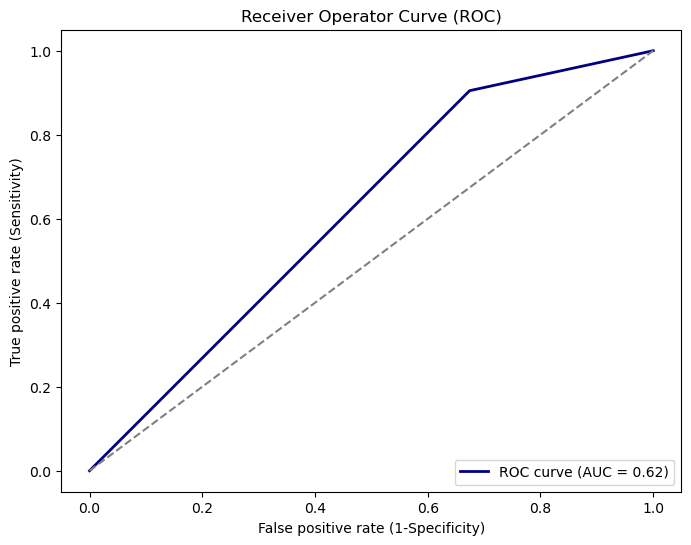

In [75]:
fpr, tpr, thresholds = roc_curve(y_log_test, pred_log)
auc = roc_auc_score(y_log_test, pred_log)

plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color='navy', lw=2, label = 'ROC curve (AUC = %0.2f)'%auc)
plt.plot([0,1], [0,1], color='gray', linestyle = '--')
plt.title('Receiver Operator Curve (ROC)')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()